In [1]:
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import numpy as np

### This is used to get the rows/columns that need to be padded across each sise 
### using the formula   Output= (Width-Filter+2\*Padding)/Stride

In [2]:
# assuming that the image shape is a square and filter is also a square filter
def padding(image,filters,stride=1):
    padding= (((image.shape[0]-1)*stride)-(image.shape[0]-filters.shape[0]))/2
    return padding

### Create the new rows and columns in the image and populate the boundary

In [3]:
def paddedImage(image, pad):
    newrow= np.zeros(shape=(image.shape[1]))
    newcol= np.zeros(shape=(image.shape[0]+int(2*pad)))
    newcol = np.reshape(newcol,(newcol.shape[0],1))
    Z=image
    for i in range(0,int(pad)):
        Z= np.vstack([Z, newrow])
        Z=np.vstack([newrow,Z])
    for i in range(0,int(pad)):
        Z= np.hstack([Z, newcol])
        Z=np.hstack([newcol,Z])
    plt.imshow(Z,cmap='gray')
    plt.title('Image after padding')
    plt.show()
    Z= populateBoundary(Z, pad)
    return Z

### Populate the boundary with the neighbouring elements

In [4]:
def populateBoundary(Z, pad):
    for i in range(int(pad),0,-1):
        Z[i-1]=Z[i]
        Z[:,i-1]=Z[:,i]
    for i in range(int(Z.shape[0]-pad-1),Z.shape[0]-1,1):
        Z[i+1]=Z[i]
        Z[:,i+1]=Z[:,i]
    return Z

In [5]:
def my_conv2(image, filters):
    # perform cross_correlation between image and filter
    output = np.zeros(shape=((image.shape[0]-(filters.shape[0])+1),(image.shape[1]-(filters.shape[1])+1)))
    filters = np.flip(np.flip(filters,axis=0),axis=1)
    print("Output shape is ",output.shape)
    k1= (int)((filters.shape[0]-1)/2)
    rem1= filters.shape[0]-(2*k1)
    k2= int((filters.shape[1]-1)/2)
    rem2= filters.shape[1]-(2*k2)
    for i in range(k1,image.shape[0]-k1-1):
        for j in range(k2,image.shape[1]-k2-1):
            image_area= image[i-k1:i+k1+rem1,j-k2:j+k2+rem2]
            temp = np.multiply(image_area,filters)
            temp_sum = np.sum(temp)
            output[i-k1,j-k2]=temp_sum
    return output

In [6]:
image = Image.open('Data/clown.tif').convert('L')

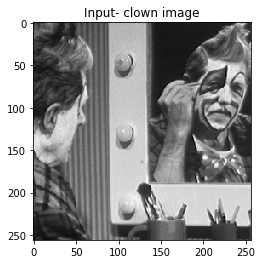

In [7]:
plt.imshow(image,cmap='gray')
plt.title("Input- clown image")
plt.show()

###  Make rectangular images to a square

In [8]:
x, y = image.size
size = min(x, y)
image = image.resize((size,size), PIL.Image.ANTIALIAS)

In [9]:
image = np.asarray(image)
template = np.ones((7,7))
template/= 49
image=image/255
print(image.shape," ",template.shape)

(256, 256)   (7, 7)


In [10]:
pad=padding(image,template)

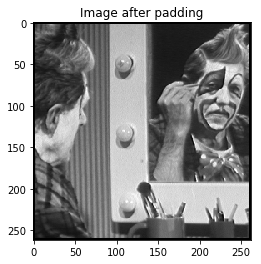

Shape after padding becomes  (262, 262)


In [11]:
image= paddedImage(image,pad)
print("Shape after padding becomes ",image.shape)

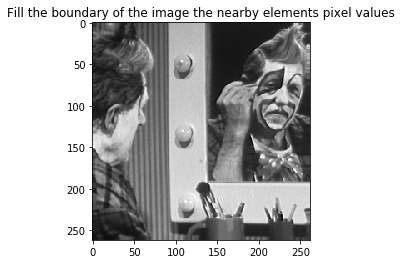

In [12]:
plt.imshow(image,cmap='gray')
plt.title('Fill the boundary of the image the nearby elements pixel values')
plt.show()

In [13]:
imageOut=my_conv2(image, template)

Output shape is  (256, 256)


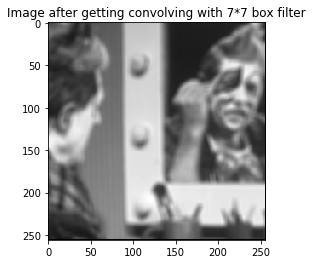

In [14]:
plt.imshow(imageOut,cmap='gray')
plt.title('Image after getting convolving with 7*7 box filter')
plt.show()